<a href="https://colab.research.google.com/github/MLMasters/DroughtDetection/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drought Data Exploration
First create symbolic link to our data folder on My Drive.

In [1]:
!ln -s drive/My\ Drive/data
!ls

data  drive  sample_data


## Load and display data

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
validation_files = dirlist('data/val/')

In [9]:
dataset = tf.data.TFRecordDataset(validation_files[0])

In [16]:
iterator = dataset.as_numpy_iterator()

In [17]:
next(iterator)

b'\n\x83\xed\x02\n\x8e!\n\x02B1\x12\x87!\n\x84!\n\x81!"!!""!!       !!!!!!!!!!""""""!!!!!!"!!     !""!! !  ! !         "!"#"!!!! !    !!!!!!!!"!"!!!""!!!!!! !     !!"!!!!!!!!!!!!   !! """#"!!!!!!!!!!! !!!!!!!!!!!!!!!!!!!!!!     !!!!!!!!!!!!!!!!!!!!!!""#"!!!!!!!!!!  !!!! !!!!!!!!!!!!!""!! ! !!!!!!!!!!"!!!"!!"!!"!! "###"! !""!    !!!!!!!!!!""!!!!""!""!! ! !!!!!!!"""!!!"!!!"! !!!!"##""!!""!!    !!!!!!!!!!!!!!!"""""!!!   !!!!"!""!!""!"""!!!!!! """""""""!!     "!!""!!!!!"!!!!!"#"""!!   !!"!"!""!!!!!!"!!!!!!!!!"""""""!!   ! \x1f ! !"!!""!"!!!! !""""!!! !!!"!!"""!! !!!!!!! !!!  !"""""!!      \x1f !!!!"""#""""""!""""""!"!!!!"""""!!! !!!!!!!!!!!  ""#"""!!       !!  !""#""##""""""#!!"""!""!""#"""!!!!"!"!!!!!!  """"""!!!!    \x1f     """""!!"""""#""""!!!!"!""###""!!!""""!!!!!!!!"#""""!!!  \x1f  \x1f     "!!!!!!""""""!""!"""!!!"#"#""""!"""!!!!!!!!!!"""""!!!!  \x1f   \x1f   !!!!!!!!!"""""""""""""#""""""#"""""""""!!!!!!!""""""!!!      \x1f\x1f !!!!!!!!!!"""!"!""!"""##"!#""""""##"""""!"!!!!!!""""!   

In [19]:
parsed = tf.train.Example.FromString(next(iterator))

In [55]:
parsed.features.feature['B4'].bytes_list

value: "16,)1/%,11-2300..)/354968?;20)\034\036\035!\'\'&,/25875..\'\'--,..0230-+*-,,2/16,)1/%,11-2300..).-(\'-/:;6,(&\"\035\034!#\"\"*.46;96--\'(-/-001131-+)1.,/0*,*!+00//646447/#(.-(\'-/:;6,(&\"\035\034!#\"\"*..463410+-*-,133/1/-.-0/.01(, \036))1.,443,.3+)/47.&\'/92&\"\035\034\034\026 %))%$,.463410+-*-,133/1/-.01-0/-.-&)0332,++*,17679:4*!)+#\"\031\030\034 \034**(*$$\'(-031315/++./0/*(\',//01-0/-./,)21.1))&-69?63/4+(\'$\"\037\"\035$.-*/*(**\'*++0221.0.)+../( \034\036\'032/(020\"%)\"/2562*&68976\'*(\'%#!$)*\'04.++)+**(,-,,12--,%),+-,!\035 \"\"*033+.21!&1,.5:613+481-/0(#$$&*16*),.\'(+&*+(--,.-40..-%)++/\'\035\033\036#&#)01,021(!,126.+,0+--(%($\"\"(*1-15+*++(&-%*.)*,-261./.2***++$\033\034\037\"$ %0+)/.-&%&**)-\"#)(+\'%\"#%&/450,)1(\'0*)%.,--+++.2210/01+)*,*\037\031\032\036 !\037&/,\'/$$$%\"#\"\035*%\036$!!#&!#%2;74.,(.*)3+)).,+\'(*.00120/12\'**,)\030\027\031\037\037\035 #--)0\"\035#! !!  !%\'$&$#)+,<<53320-*+2-*+./+$)-10132//11)(+,,\032\027\027  \"!#01..\036\035*%\"&\'#%/&)-))+4019646440.

In [52]:
def get_img(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example.features.feature[band].bytes_list.value[0], dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed.features.feature['label'].int64_list.value[0], tf.int32).numpy()
        
    return rgbArray, label

In [56]:
rgb, l = get_img(parsed)

Text(0.5, 1.0, '0')

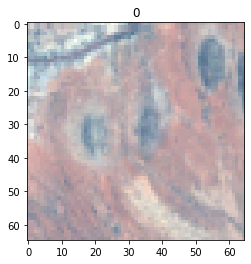

In [57]:
plt.imshow(rgb)
plt.title(l)